# Homework 1

**Course**: FFR120 - Simulation of Complex Systems

**Author**: Artur Gasparyan

**Assignment**: Homework 1 - Option 4

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1.1 

In [16]:
def create_grid_1d(n_cells, n_generations, rng):
    parent_generation = rng.integers(0, 2, size=(n_cells,))
    grid = np.zeros(shape=(n_generations, n_cells), dtype='uint8')
    grid[0, :] = parent_generation 

    return grid


def decode_1d_rule(rule_number):
    binary_numbers = [
        (1, 1, 1), (1, 1, 0), (1, 0, 1), (1, 0, 0),
        (0, 1, 1), (0, 1, 0), (0, 0, 1), (0, 0, 0)
    ]

    rule = dict()
    num = rule_number
    for i in range(8):
        num, rem = divmod(num, 2)
        rule[binary_numbers[-i-1]] = rem

    return rule


def update_grid_1d(grid, n_cells, rules, rng):
    grid = np.roll(grid, 1, 0)
    for i in range(1, n_cells-1):
        pattern = grid[1, i-1:i+2]
        grid[0, i] = rules[tuple(pattern)]

    left_pattern = np.zeros(shape=(3,))
    left_pattern[0] = rng.integers(0, 2, size=(1,))
    left_pattern[1:] = grid[1, :2]

    right_pattern = np.zeros(shape=(3,))
    right_pattern[-1] = rng.integers(0, 2, size=(1,))
    right_pattern[:2] = grid[1, -2:]

    grid[0, 0] = rules[tuple(left_pattern)]
    grid[0, -1] = rules[tuple(right_pattern)]

    return grid


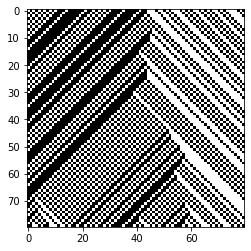

In [83]:

def render_grid(grid, figure, axis):
    global screen
    axis.imshow(grid, interpolation='nearest', cmap="gray")
    screen.update(figure)
    sleep(0.05)
    plt.pause(0.005)

    # TODO: Fix rendering


In [84]:
def run_simulation_1d(n_cells, n_generations, rule_nr, rng):
    rules = decode_1d_rule(rule_number=rule_nr)
    grid = create_grid_1d(n_cells, n_generations, rng)

    for gen in range(n_generations):
        grid = update_grid_1d(grid, n_cells, rules, rng)
        render_grid(grid)


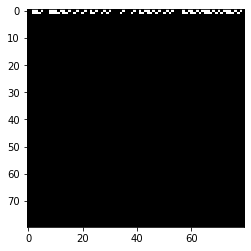

In [85]:
rng = np.random.default_rng()
rule_nr = 184
n_cells = 80
n_generations = 80

run_simulation_1d(n_cells, n_generations, rule_nr, rng)